# Richter's Predictor: Modeling Earthquake Damage
_Hosted By DrivenData_

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by the Gorkha earthquake.

We're trying to predict the ordinal variable `damage_grade`, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

 1. represents low damage
 2. represents a medium amount of damage
 3. represents almost complete destruction

The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. 
 
To measure the performance of our algorithms, we'll use the _F1 score_ which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the _micro averaged F1 score_.
 
 - [Loading data](#Loading-data)
 - [Exploratory data analysis](#Exploratory-data-analysis)
 - [Model training](#Model-training)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## Loading data

In [3]:
project_root_dir = '/Users/angelo/Programming/data/modeling-earthquake-damage'
train_values_file = os.path.join(project_root_dir, 'train_values.csv')
train_labels_file = os.path.join(project_root_dir, 'train_labels.csv')
test_values_file = os.path.join(project_root_dir, 'test_values.csv')

In [4]:
train_values_df = pd.read_csv(train_values_file)
train_labels_df = pd.read_csv(train_labels_file)
test_values_df = pd.read_csv(test_values_file)

In [5]:
has_df_columns = train_values_df.filter(regex='has_').columns
train_values_df[has_df_columns] = train_values_df[has_df_columns].astype('object')

In [6]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [7]:
col_int = train_values_df.select_dtypes('int64').columns
col_cat = train_values_df.select_dtypes('object').columns
print(col_int)
print(col_cat)

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'count_families'],
      dtype='object')
Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use

In [8]:
train_values_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels_df.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [10]:
test_values_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
train_values_df.nunique()

building_id                               260601
geo_level_1_id                            31    
geo_level_2_id                            1414  
geo_level_3_id                            11595 
count_floors_pre_eq                       9     
age                                       42    
area_percentage                           84    
height_percentage                         27    
land_surface_condition                    3     
foundation_type                           5     
roof_type                                 3     
ground_floor_type                         5     
other_floor_type                          4     
position                                  4     
plan_configuration                        10    
has_superstructure_adobe_mud              2     
has_superstructure_mud_mortar_stone       2     
has_superstructure_stone_flag             2     
has_superstructure_cement_mortar_stone    2     
has_superstructure_mud_mortar_brick       2     
has_superstructure_c

In [12]:
train_values_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [13]:
train_values_df.describe().applymap('{:.2f}'.format)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00
mean,525675.48,13.90,701.07,6257.88,2.13,26.54,8.02,5.43,0.98
std,304545.00,8.03,412.71,3646.37,0.73,73.57,4.39,1.92,0.42
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00
25%,261190.00,7.00,350.00,3073.00,2.00,10.00,5.00,4.00,1.00
50%,525757.00,12.00,702.00,6270.00,2.00,15.00,7.00,5.00,1.00
75%,789762.00,21.00,1050.00,9412.00,2.00,30.00,9.00,6.00,1.00
max,1052934.00,30.00,1427.00,12567.00,9.00,995.00,100.00,32.00,9.00


## Exploratory data analysis

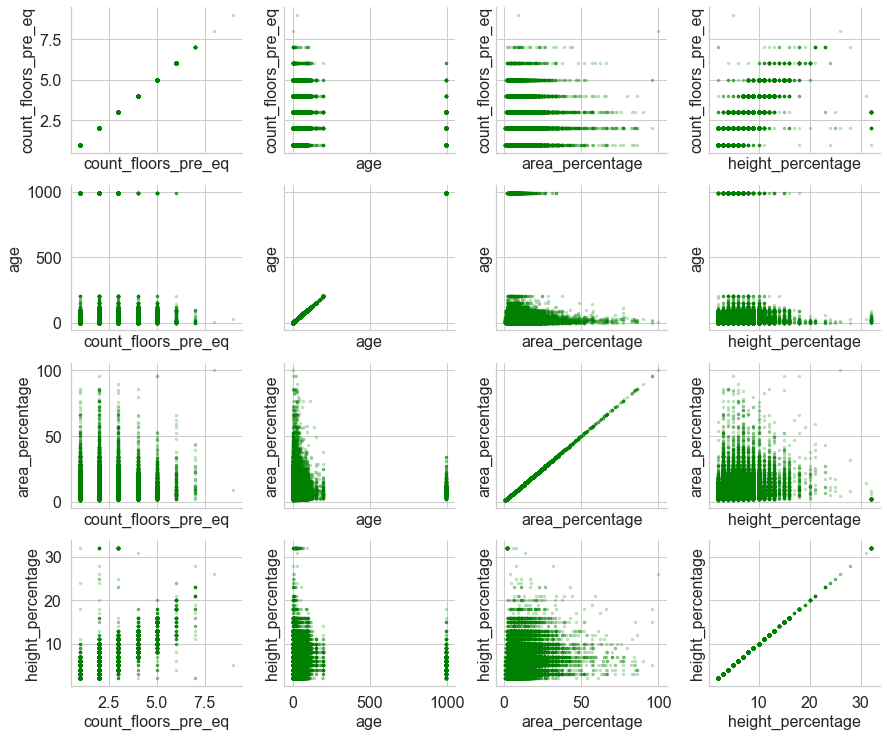

In [17]:
sns.set(style="whitegrid", color_codes=True)
# change data frame here
df = train_values_df
# If short on space, decide the number of columns to show. I have
# two lists, col1 and col2, where I start with col1 and do the
# same in a later plot with col2. With the x_vars (and y_vars)
# options you can plot the variables in the col1 list AGAINST all 
# the other variables.
g = sns.PairGrid(df, x_vars=col_int[4:8], y_vars=col_int[4:8], height=2.6, aspect=1.2)
g = g.map(plt.scatter, s=6, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 16

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();

## Model training